In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/heart.csv')

In [2]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data = np.asarray(df)

X = data[:,:-1]
y =  data[:,-1]

In [5]:
#podziel dane z wykorzystaniem test_size= 0.2 i stałego random_state
#przygotuj klasyfikator z użyciem KNeighborsClassifier i n_neighbors = 1
#wyświetl accuracy
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.6229508196721312


In [10]:
#przerób funkcję classification (z poprzednich notatników) aby obsługiwała KNeighborsClassifier i przyjmowała liczbę 
#sąsiadów jako argument
def clasification(X,y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [11]:
results = []
n_neighbors = [i for i in range(1,50)]
for neighbor in n_neighbors:
    results.append(classification(X,y, neighbor))         

Text(0, 0.5, 'accuracy')

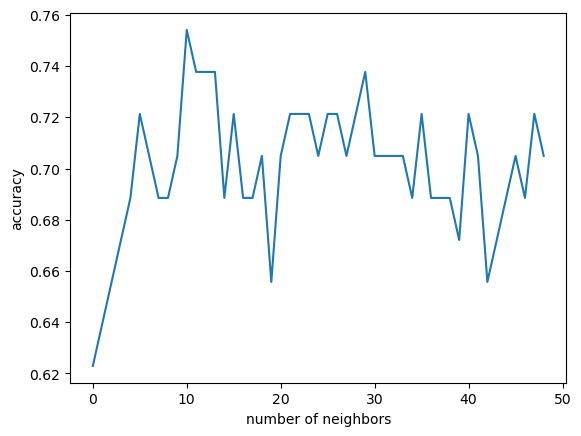

In [12]:
plt.plot(results)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")

In [13]:
results = []
n_neighbors = [i for i in range(1,50,2)]
for neighbor in n_neighbors:
    results.append(clasification(X,y, neighbor))

Text(0, 0.5, 'accuracy')

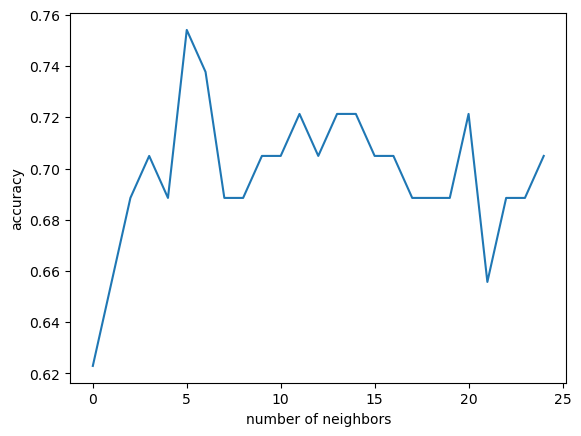

In [14]:
plt.plot(results)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")